In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Phishing_Legitimate_full.csv")
data.head()



,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [3]:
target = data["CLASS_LABEL"]
target.value_counts()

1    5000
0    5000
Name: CLASS_LABEL, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

**Do more EDA: bar charts, feature selection methods

Note: Go through each column and see if the data type is appropriate
_Run how each feature contributes to the overall MODEL--Use variables that are contributing to the phising solution the most... check for corellation using a heat map
**detect multicollinarity

Check for ouliers, boxplot
Numeric variables: scartter plot



MORE EDA

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
Data = data = pd.read_csv("dataset_phishing.csv")
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [10]:
data.shape

(11430, 89)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [12]:
# Checking for missing values in dataset
data.isna().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

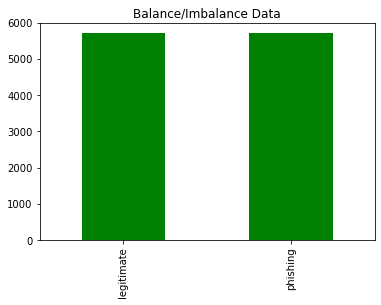

In [13]:
# Checking if data is balanced
import matplotlib.pyplot as plt
import seaborn as sns

data['status'].value_counts().plot(kind='bar', color='green', title="Balance/Imbalance Data");

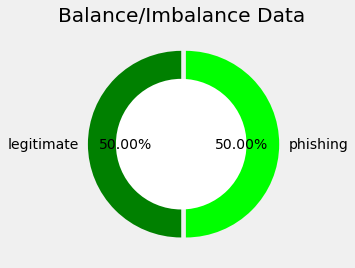

In [14]:
with plt.style.context(style="fivethirtyeight"):
    plt.pie(x=dict(data['status'].value_counts()).values(),
           labels=dict(data['status'].value_counts()).keys(),
           autopct="%.2f%%",
           colors=['green','lime'],
           startangle=90,
           explode=[0,0.05])
    centre_circle=plt.Circle((0,0),0.70,fc='white')
    fig=plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(label="Balance/Imbalance Data")
    plt.show()

In [15]:
# Encoding 
# Legitimate = 1 | Phishing = 0
data['target'] = pd.get_dummies(data['status'])['legitimate'].astype('int')
data.drop('status', axis = 1, inplace=True)
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,target
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,1
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,0
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,0
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,1
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,1


In [16]:
data.drop('url', axis=1, inplace=True)
data.head(3)

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,target
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,1
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,0
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,0


In [17]:
import seaborn as sns
#sns.distplot(data["domain_age"])

# What unit is the age calculated?

In [18]:
# Perform Train Test Split

from sklearn.model_selection import train_test_split
data_train, data_test= train_test_split(data, test_size=0.7, random_state=42)

In [19]:
#Scaling the training data

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

data_trainScaled=scaler.fit_transform(data_train)
data_testScaled=scaler.transform(data_test)

#convert the scalled data array into dataframe
data_trainScaled=pd.DataFrame(data_trainScaled, columns=data_train.columns)
data_testScaled=pd.DataFrame(data_testScaled, columns=data_test.columns)

In [20]:
data_trainScaled

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,target
0,0.033784,0.095694,0.0,0.086957,0.09375,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.392229,0.000858,0.040518,0.0,0.0,0.5,1.0
1,0.031327,0.047847,0.0,0.043478,0.06250,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.051528,0.684473,0.007152,0.0,0.0,0.6,1.0
2,0.020885,0.076555,0.0,0.043478,0.06250,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.156131,0.484130,0.007880,0.0,0.0,0.5,1.0
3,0.030098,0.033493,0.0,0.043478,0.06250,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.031818,0.661390,0.003920,0.0,0.0,0.4,1.0
4,0.022113,0.076555,0.0,0.043478,0.03125,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.024919,0.482804,0.057689,0.0,0.0,0.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3424,0.023956,0.095694,0.0,0.000000,0.03125,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.021681,0.216798,0.028826,0.0,0.0,0.4,1.0
3425,0.017199,0.138756,0.0,0.086957,0.09375,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.028439,0.013803,0.000000,0.0,1.0,0.0,0.0
3426,0.014128,0.076555,0.0,0.086957,0.00000,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.000141,0.180067,0.378866,0.0,1.0,0.2,0.0
3427,0.007985,0.062201,0.0,0.043478,0.03125,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.024074,0.044607,0.000000,0.0,1.0,0.2,0.0


In [21]:
# Dividing train and test data into X(predictors) and y(target)



X_train=data_trainScaled.drop('target',axis=1)
X_test=data_testScaled.drop('target',axis=1)

y_train=data_trainScaled['target']
y_test=data_testScaled['target']


USING LOGISTIC REGRESSION TO FILTER FEATURES, Using Lasso regularization for feature selection.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [23]:
#Finding the best alpha(lambda) for lasso regularization

lasso=Lasso()
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10]}
folds=5

lasso_model_cv=GridSearchCV(estimator=lasso, param_grid=params, scoring='r2',cv=folds, return_train_score=True, verbose=1)
lasso_model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.2s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                   10]},
             return_train_score=True, scoring='r2', verbose=1)

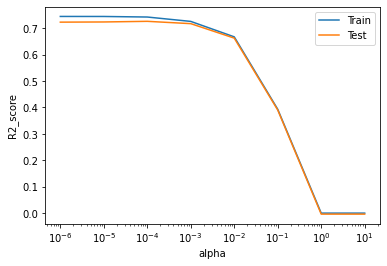

In [24]:
GridSearchCV(cv=5, estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
             max_iter=1000, normalize=False, positive=False, precompute=False, random_state=None,
             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None, param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

cv_results= pd.DataFrame(lasso_model_cv.cv_results_)

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

In [25]:
# Using lasso regularization for feature selection

lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
print(lasso.coef_)

[-0.         -0.         -0.06318404 -0.          0.28104019 -0.
 -0.23469744 -0.          0.         -0.          0.          0.
 -0.         -0.          0.         -0.          0.         -0.
  0.          0.          0.33484522 -0.         -0.07522808 -0.
  0.04172668 -0.12946019 -0.07889163  0.          0.          0.
  0.          0.         -0.0416778  -0.          0.00647082 -0.09133493
  0.          0.05320197  0.         -0.         -0.          0.
  0.         -0.07545562 -0.         -0.         -0.         -0.
 -0.         -0.         -0.35782873 -0.         -0.         -0.
 -0.          0.          0.          0.         -0.14171216  0.
  0.          0.          0.1121656   0.          0.          0.
  0.02675022  0.01754548  0.          0.06248502  0.11522807  0.
 -0.          0.          0.05672679  0.         -0.         -0.
 -0.07786506  0.03335544  0.05107013 -0.093376    0.10369126  0.
 -0.         -0.45485935  0.4813116 ]


In [26]:
# getting all the variables and coefficients after lasso regression

lasso_dict=dict(zip(X_train.columns,lasso.coef_))

In [27]:
#finding the mean of the coefficients 

from statistics import mean
mean(lasso_dict[k] for k in lasso_dict)

-0.0015857072552889994

The mean is approximately zero so use predictors with coefficients more than zero

In [28]:
#filter dictionary for only non-zero coefficients and round coeficient to 4 significant digits

predictors={}
for i in lasso_dict:
    if lasso_dict[i]>0:
        predictors[i]= round(lasso_dict[i],4)
predictors

{'nb_hyphens': 0.281,
 'nb_www': 0.3348,
 'https_token': 0.0417,
 'random_domain': 0.0065,
 'nb_redirection': 0.0532,
 'ratio_extRedirection': 0.1122,
 'external_favicon': 0.0268,
 'links_in_tags': 0.0175,
 'ratio_intMedia': 0.0625,
 'ratio_extMedia': 0.1152,
 'safe_anchor': 0.0567,
 'domain_with_copyright': 0.0334,
 'whois_registered_domain': 0.0511,
 'domain_age': 0.1037,
 'page_rank': 0.4813}

In [29]:
sortedpredictors = sorted(predictors.items(), key=lambda x:x[1], reverse=True)
OrderedPredictors = dict(sortedpredictors)

print(OrderedPredictors)


{'page_rank': 0.4813, 'nb_www': 0.3348, 'nb_hyphens': 0.281, 'ratio_extMedia': 0.1152, 'ratio_extRedirection': 0.1122, 'domain_age': 0.1037, 'ratio_intMedia': 0.0625, 'safe_anchor': 0.0567, 'nb_redirection': 0.0532, 'whois_registered_domain': 0.0511, 'https_token': 0.0417, 'domain_with_copyright': 0.0334, 'external_favicon': 0.0268, 'links_in_tags': 0.0175, 'random_domain': 0.0065}


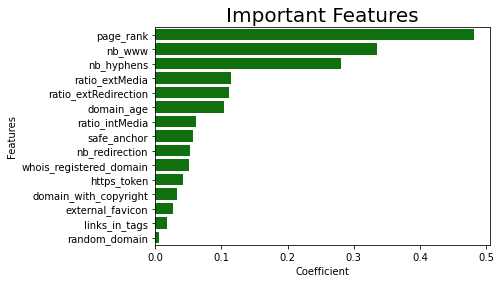

In [30]:
Feature = list(OrderedPredictors.keys())
Coefficient = list(OrderedPredictors.values())

sns.barplot(x=Coefficient, y=Feature, color="green")

plt.xlabel('Coefficient', fontsize=10);
plt.ylabel('Features', fontsize=10);
plt.title("Important Features", fontsize=20);

Sort bar above, pick top 10
Select top 3 models and check performance of all the three and select the best 

**DATA AFTER FEATURE ENGINEERING**

In [31]:
#Creating a new dataframe based on feature selection

PhishingData = Data[["page_rank","nb_www","nb_hyphens","ratio_extMedia",
                     "ratio_extRedirection","domain_age","ratio_intMedia",
                     "safe_anchor","nb_redirection","whois_registered_domain","https_token",
                     "domain_with_copyright","external_favicon","links_in_tags","random_domain","target"]].copy()

PhishingData.head()

,page_rank,nb_www,nb_hyphens,ratio_extMedia,ratio_extRedirection,domain_age,ratio_intMedia,safe_anchor,nb_redirection,whois_registered_domain,https_token,domain_with_copyright,external_favicon,links_in_tags,random_domain,target
0,4,1,0,0.000000,0.875000,-1,100.000000,0.0,0,0,1,1,0,80.000000,0,1
1,2,0,0,20.000000,0.000000,5767,80.000000,100.0,1,0,1,0,0,100.000000,0,0
2,0,0,1,0.000000,0.000000,4004,0.000000,100.0,1,0,0,0,0,100.000000,0,0
3,3,0,0,3.571429,0.250000,-1,96.428571,62.5,1,0,1,0,0,100.000000,0,1
4,6,1,2,100.000000,0.537037,8175,0.000000,0.0,1,0,1,1,0,76.470588,0,1


Based on the feature engineering, the features that contribute the most to the target are:

-Page_rank: How search engines ranks a particular website when browsed on the internet
-Nb_www: Number of "www" in the URL or URL is missing "www"
-Nb_hyphens: Number of hyphens in the URL
-Ratio_extMedia: ratio of external media file links
-Ratio_ExtRedirection: Ratio of external redirection
-Domain_age: How long the domain has been in use, note; -ve domain age is how long the domain has been dormant/not in use
-Ratio_intMedia: Ratio of internal media file links
-Safe_anchor: Presence of ‘#’, ‘javascript’, or ‘mailto’ tags
-Nb_redirection: Number of redirections before loading the website
-Whois_registered_domain: Whether domain matches WHOIS database

In [32]:
PhishingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   page_rank                11430 non-null  int64  
 1   nb_www                   11430 non-null  int64  
 2   nb_hyphens               11430 non-null  int64  
 3   ratio_extMedia           11430 non-null  float64
 4   ratio_extRedirection     11430 non-null  float64
 5   domain_age               11430 non-null  int64  
 6   ratio_intMedia           11430 non-null  float64
 7   safe_anchor              11430 non-null  float64
 8   nb_redirection           11430 non-null  int64  
 9   whois_registered_domain  11430 non-null  int64  
 10  https_token              11430 non-null  int64  
 11  domain_with_copyright    11430 non-null  int64  
 12  external_favicon         11430 non-null  int64  
 13  links_in_tags            11430 non-null  float64
 14  random_domain         

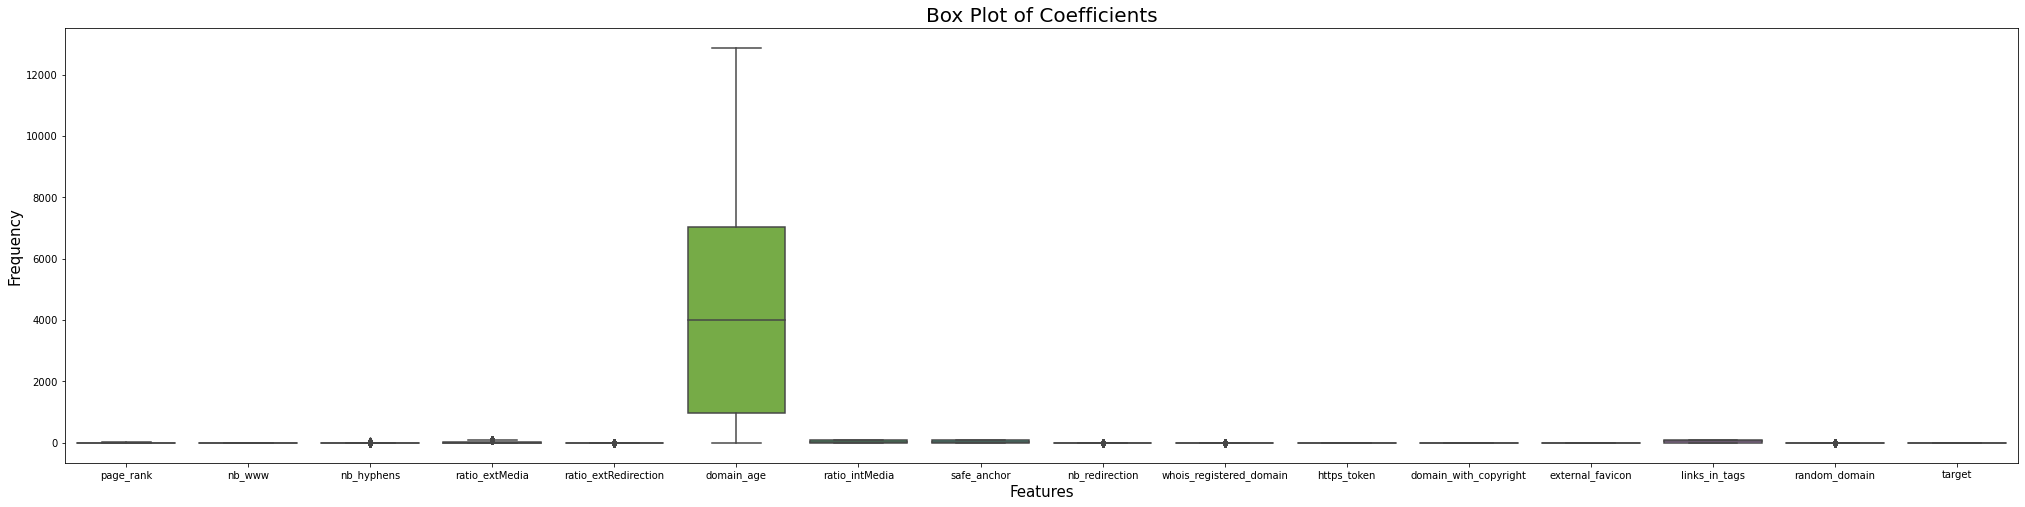

In [33]:
import matplotlib.pyplot as plt

fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(35, 8)

plt.xlabel('Features', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
sns.boxplot(data=PhishingData)
plt.title("Box Plot of Coefficients", fontsize=20);

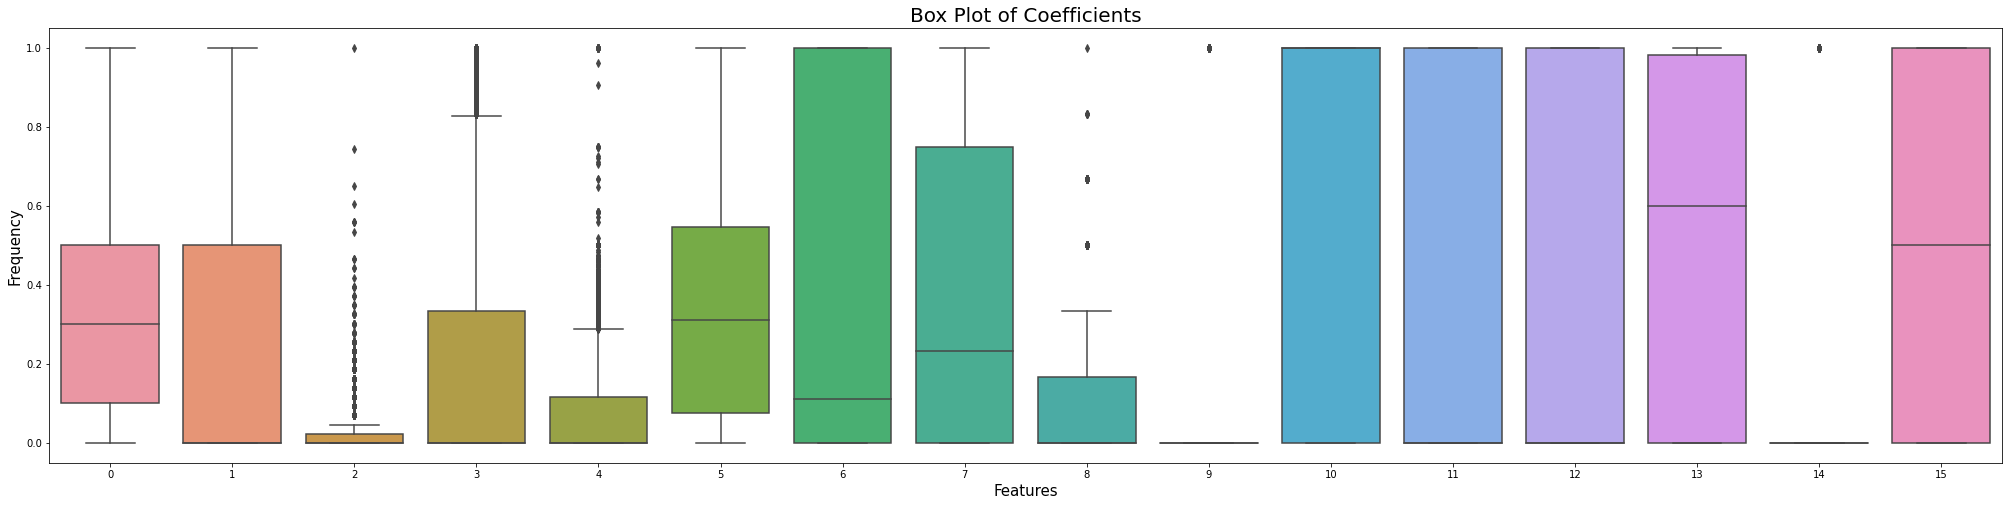

In [66]:
scaler=MinMaxScaler()

datascaled=scaler.fit_transform(PhishingData)

import matplotlib.pyplot as plt

fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(35, 8)

plt.xlabel('Features', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
sns.boxplot(data=datascaled)
plt.title("Box Plot of Coefficients", fontsize=20);

In [34]:
#Creating data that will be used for modelling, 
#removing domain_age and and random_domain column due to incredibly high variance 
#and small contributing coeffcient respectively)

ModelData = PhishingData[["page_rank","nb_www","nb_hyphens","ratio_extMedia",
                     "ratio_extRedirection","ratio_intMedia",
                     "safe_anchor","nb_redirection","whois_registered_domain","https_token",
                     "domain_with_copyright","external_favicon","links_in_tags","target"]].copy()

ModelData.head()

,page_rank,nb_www,nb_hyphens,ratio_extMedia,ratio_extRedirection,ratio_intMedia,safe_anchor,nb_redirection,whois_registered_domain,https_token,domain_with_copyright,external_favicon,links_in_tags,target
0,4,1,0,0.000000,0.875000,100.000000,0.0,0,0,1,1,0,80.000000,1
1,2,0,0,20.000000,0.000000,80.000000,100.0,1,0,1,0,0,100.000000,0
2,0,0,1,0.000000,0.000000,0.000000,100.0,1,0,0,0,0,100.000000,0
3,3,0,0,3.571429,0.250000,96.428571,62.5,1,0,1,0,0,100.000000,1
4,6,1,2,100.000000,0.537037,0.000000,0.0,1,0,1,1,0,76.470588,1


In [35]:
# Perform Train Test Split on Model Data

from sklearn.model_selection import train_test_split
data_train, data_test= train_test_split(ModelData, test_size=0.7, random_state=42)

In [36]:
#Scaling the model data

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

data_trainScaled=scaler.fit_transform(data_train)
data_testScaled=scaler.transform(data_test)

#convert the scaled data array into dataframe
data_trainScaled=pd.DataFrame(data_trainScaled, columns=data_train.columns)
data_testScaled=pd.DataFrame(data_testScaled, columns=data_test.columns)

In [37]:
# Dividing scaled train and test model data into X(predictors) and y(target)

X_train=data_trainScaled.drop('target',axis=1)
X_test=data_testScaled.drop('target',axis=1)

y_train=data_trainScaled['target']
y_test=data_testScaled['target']


**Building first model, decision tree**

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [39]:
# Classification report

# Test set predictions
pred= tree_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      4027
         1.0       0.85      0.87      0.86      3974

    accuracy                           0.86      8001
   macro avg       0.86      0.86      0.86      8001
weighted avg       0.86      0.86      0.86      8001



In [40]:
print("Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Accuracy for Decision Tree Classifier: 86.08%


**Building second model, Random Forest**

In [41]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [42]:
# Accuracy score for train data
forest.score(X_train, y_train)

0.8944298629337999

In [43]:
# Accuracy score for test data
forest.score(X_test, y_test)

0.8807649043869517

In [44]:
# Classification report
# Classification report

# Test set predictions
predict= forest.predict(X_test)
print(classification_report(y_test, predict))


              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      4027
         1.0       0.88      0.88      0.88      3974

    accuracy                           0.88      8001
   macro avg       0.88      0.88      0.88      8001
weighted avg       0.88      0.88      0.88      8001



**Building third model, XGBoost**

In [56]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [57]:
# Classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.91      4027
         1.0       0.91      0.90      0.91      3974

    accuracy                           0.91      8001
   macro avg       0.91      0.91      0.91      8001
weighted avg       0.91      0.91      0.91      8001



In [47]:
#Performance on test data
from sklearn import metrics

print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Accuracy: 0.9080114985626797


In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[3683,  344],
       [ 392, 3582]], dtype=int64)

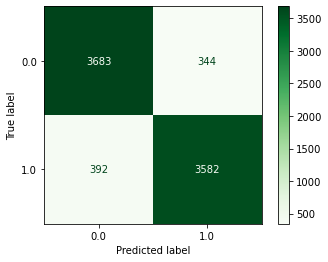

In [49]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Greens)

plt.show()

**Building fourth model, Logistic Regession**

In [62]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_predicted = model1.predict(X_test)

In [59]:
#Performance on train and test data
accuracy = model.score(X_train, y_train)
print("Train Accuracy: {:.2f}%".format(accuracy * 100))

accuracy = model.score(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

Train Accuracy: 96.73%
Test Accuracy: 90.80%


In [64]:
# Classification report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83      4027
         1.0       0.82      0.85      0.84      3974

    accuracy                           0.83      8001
   macro avg       0.83      0.83      0.83      8001
weighted avg       0.83      0.83      0.83      8001

